In [ ]:
!pip install yfinance
!pip install yahoofinancials
!pip install matplotlib

1) I distinctly chose stocks from different sectors, but due to time constraint on my side i was not able to do much research. so i just chose the best performing stocks.
2) More the number of stocks in the portfolio lesser the risk of loss is as the number of stocks diversifies ur wealth distribution.
3)Equal weight can not be given to every stock as some might be performing low while some might be at their best.
4)Mean-Variance Optimization.

In [ ]:
import yfinance as yf
import yahoofinancials
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
data = []

#list of stocks in portfolio
stocks = ['RELIANCE.NS','BAJAJ-AUTO.NS','HDFCBANK.NS','TCS.NS', 'ASIANPAINT.NS']

#download daily price data for each of the stocks in the portfolio
# 01/04/2015-31/03/2017
for t in stocks:
  data.append(yf.download(t, 
                      start='2015-04-01', 
                      end='2017-03-31'
                      ))
data = pd.concat([data[0]['Adj Close'], data[1]['Adj Close'], data[2]['Adj Close'], data[3]['Adj Close'], data[4]['Adj Close']], axis=1)
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
Date,,,,,
2015-04-01,394.76492,1680.06702,495.67850,1115.86743,784.87573
2015-04-06,389.38205,1693.87488,495.05484,1117.90820,787.55029
2015-04-07,393.25388,1742.24414,495.43863,1134.45288,797.77075
2015-04-08,408.85944,1746.36145,496.78186,1159.20471,808.89868
2015-04-09,422.64703,1745.57129,506.64023,1169.36450,814.91638
...,...,...,...,...,...
2017-03-24,621.01630,2470.45801,694.08618,1107.33398,1033.12341
2017-03-27,603.81079,2440.39136,687.02039,1100.42249,1012.39783
2017-03-28,601.22870,2454.68628,692.06396,1108.58862,1026.91064


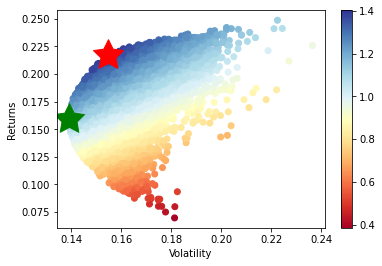

In [ ]:
data.sort_index(inplace=True)

#convert daily stock prices into daily returns
returns = data.pct_change()

#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000

#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(stocks)-1,num_portfolios))

for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4]])

#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [ ]:
print(max_sharpe_port)

ret             0.21695
stdev           0.15473
sharpe          1.40214
RELIANCE.NS     0.22069
BAJAJ-AUTO.NS   0.18548
HDFCBANK.NS     0.54405
TCS.NS          0.00031
ASIANPAINT.NS   0.04947
Name: 16478, dtype: float64


In [ ]:
print(min_vol_port)

ret             0.15926
stdev           0.13908
sharpe          1.14509
RELIANCE.NS     0.08492
BAJAJ-AUTO.NS   0.04637
HDFCBANK.NS     0.50496
TCS.NS          0.25308
ASIANPAINT.NS   0.11067
Name: 9928, dtype: float64
